# Census Income

## Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


## Featues:

Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, 
Capital_loss, Hours_per_week, Native_country.

## Target:

Income

## Census money income defination: 
It is defined as income received on a regular basis (exclusive of certain money receipts such as capital gains) before payments for personal income taxes, social security, union dues, medicare deductions, etc.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


As per observation:

1. The dataset has 32560 rows and 15 columns.
2. No any null values.
3. Dataset has object and int types data.

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(32536, 15)

After removing duplicate values, dataset has 32536 rows and 15 columns.

# Now Seperate Object and Numeric (Int, Float) datatype for future process.

In [7]:
object_datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        object_datatypes.append(i)
print(len(object_datatypes))
object_datatypes  

9


['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [8]:
for i in df.columns:
    if df[i].dtypes == 'object':
        val=df[i].value_counts()
        nval=df[i].nunique()
        print(i ,':','\n',val, '\t:Total Categories:', nval, '\n')

Workclass : 
  Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 	:Total Categories: 9 

Education : 
  HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64 	:Total Categories: 16 

Marital_status : 
  Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Mar

In [9]:
numeric_datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numeric_datatypes.append(i) 
print('Total:', len(numeric_datatypes))
numeric_datatypes

Total: 6


['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [10]:
for i in df.columns:
    if df[i].dtypes != 'object':
        val=df[i].value_counts()
        nval=df[i].nunique()
        print(i ,':','\n',val, '\t:Total Categories:', nval, '\n')

Age : 
 36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64 	:Total Categories: 73 

Fnlwgt : 
 123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64 	:Total Categories: 21647 

Education_num : 
 9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64 	:Total Categories: 16 

Capital_gain : 
 0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64 	:Total Categories: 119 

Capital_loss : 
 0       31017
1902      202
1977      168
1887      159
1

As per observarion of value_count and nunique values,
1. 'workclass', 'occupation', 'Native_country' categorical columns have "?" value, which menas unknown values.
2. Numeric columns with more than 70%-75% nulls means here it is '0' value, drop them, otherwise it gives poor performance of models.

# Let's handle unknown '?' value & Data Visualization.

<Figure size 1080x576 with 0 Axes>

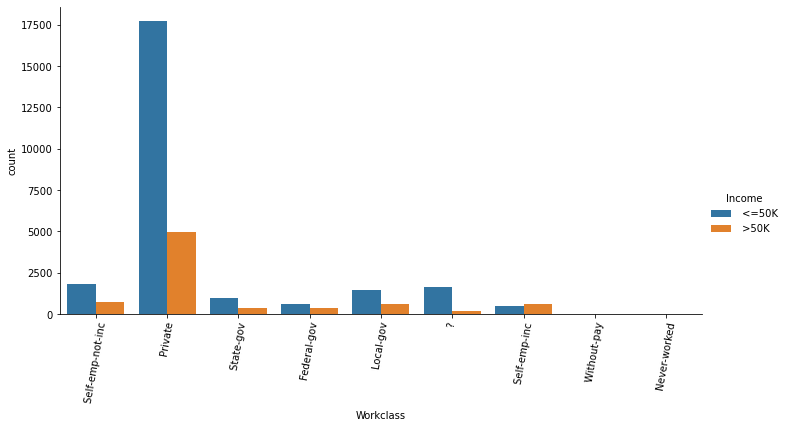

In [11]:
plt.figure(figsize=(15,8))
sns.factorplot(x='Workclass',data=df,kind='count',hue='Income',height=5, aspect=2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

In [12]:
df.Workclass = df.Workclass.str.replace('?',df.Workclass.mode().iloc[0]) # get mode of Workclass column

<Figure size 1440x720 with 0 Axes>

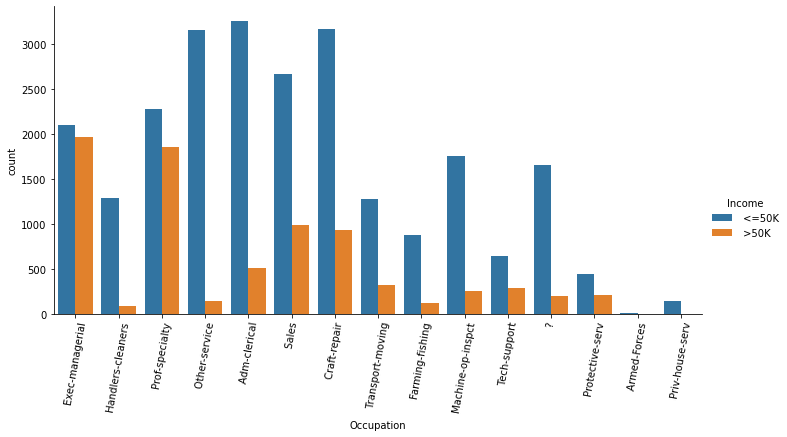

In [13]:
plt.figure(figsize=(20,10))
sns.factorplot(x='Occupation',data=df,kind='count',hue='Income',height=5, aspect=2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

In [14]:
df.Occupation = df.Occupation.str.replace('?','Other-service')

In [15]:
df.Native_country = df.Native_country.str.replace('?',df.Native_country.mode().iloc[0])

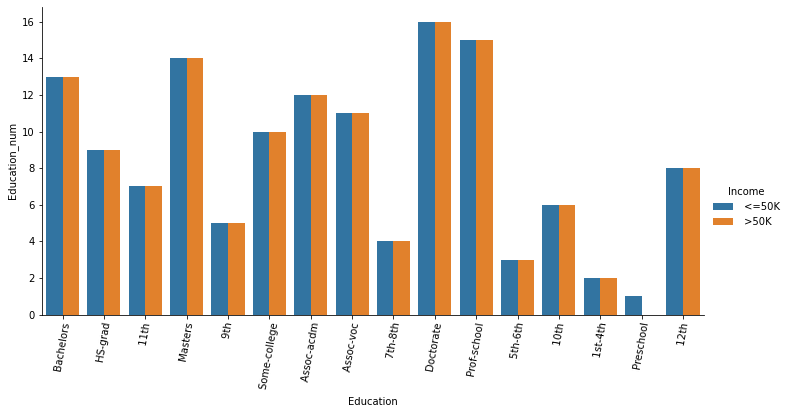

In [16]:
#plt.figure(figsize=(20,10))
sns.catplot(x='Education',y='Education_num', data=df,hue="Income",kind='bar',height=5, aspect=2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

As per observation, Education_num is totaly same as Education, so can drop Education column.

In [17]:
df.drop(columns='Education',inplace=True)

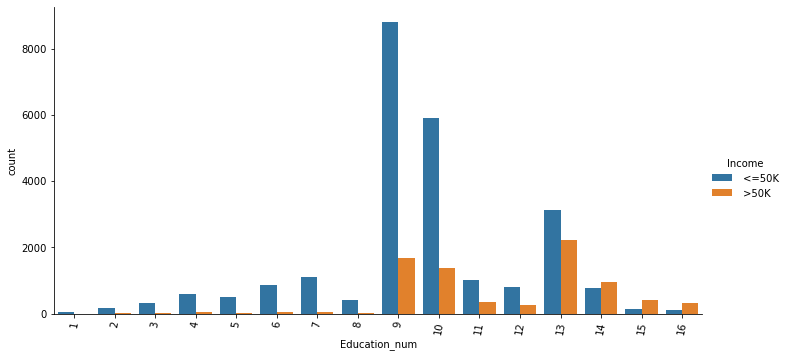

In [18]:
sns.factorplot(x='Education_num',data=df,kind='count',hue='Income',height=5, aspect=2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

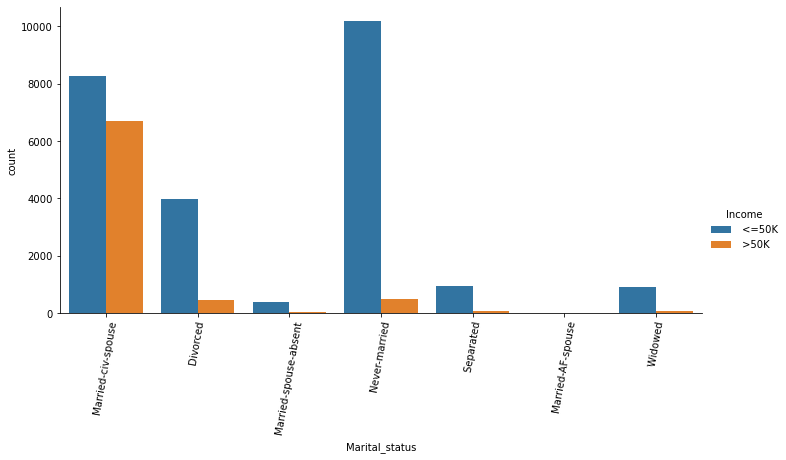

In [19]:
sns.factorplot(x='Marital_status',data=df,kind='count',hue='Income',height=5, aspect=2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

In [35]:
# As per Defination of Census Income, It excluded the Capital gain, Capital loss, etc,money.
# Also these columns having more number of 0's, so dropt them
df.drop("Capital_gain",axis=1,inplace=True)
df.drop("Capital_loss",axis=1,inplace=True)

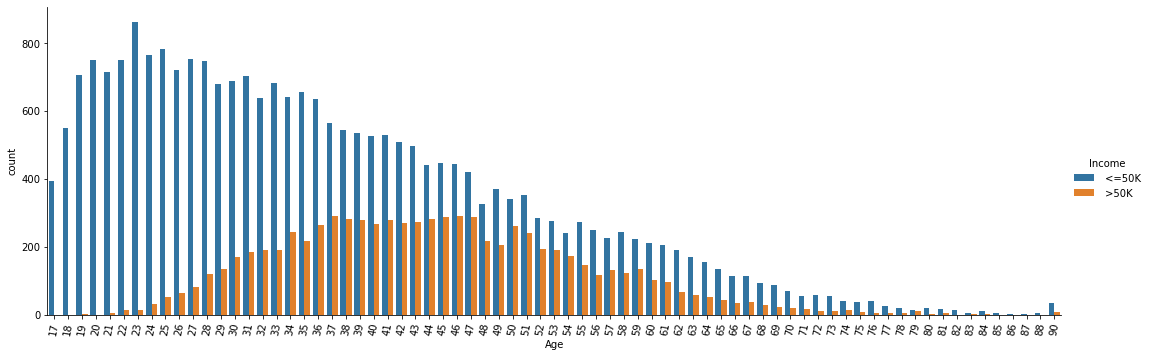

In [36]:
sns.factorplot(x='Age',data=df,kind='count',hue='Income',height=5, aspect=3)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.show()

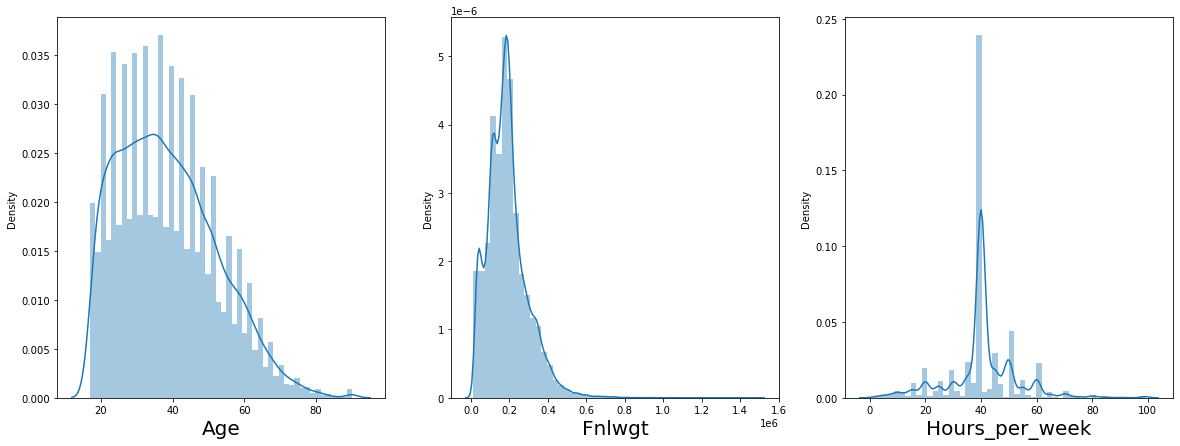

In [37]:
plt.figure (figsize=(20,7))
plotnumber = 1

numeric_featues=['Age','Fnlwgt','Hours_per_week']
for column in numeric_featues:
    if plotnumber<=16:
        ax=plt.subplot(1,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)          
    plotnumber+=1
                     
plt.show()

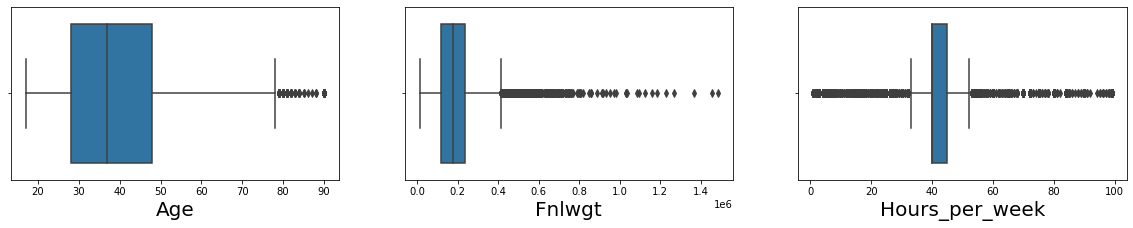

In [38]:
plt.figure (figsize=(20,7))
plotnumber = 1

for column in numeric_featues:
    if plotnumber<=16:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)          
    plotnumber+=1
                     
plt.show()

In [39]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,40.440343
std,13.638193,1.055563e+05,2.571622,12.347079
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


As per observation, in huge level of outliers in numericdatatypes columns, let's try to reduce it.

# correlation of one variable vs all other variables, or multicorelation

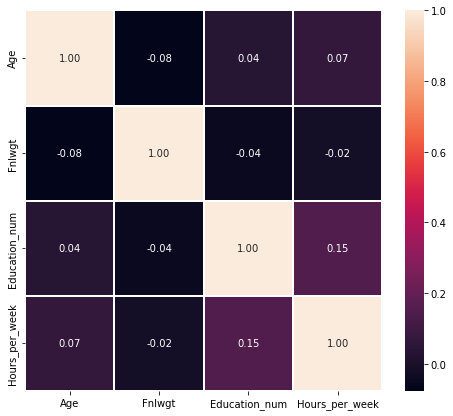

In [40]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, linewidths=0.1,fmt="0.2f")
plt.show()

# Since the dataset has a lot of string vales. We will use the encoding techniques to convert the sring data to numerical data.

In [41]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))
        
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6.0,83311,13,2.0,3.0,0.0,4.0,1.0,13,39.0,0.0
1,38,4.0,215646,9,0.0,5.0,1.0,4.0,1.0,40,39.0,0.0
2,53,4.0,234721,7,2.0,5.0,0.0,2.0,1.0,40,39.0,0.0
3,28,4.0,338409,13,2.0,9.0,5.0,2.0,0.0,40,5.0,0.0
4,37,4.0,284582,14,2.0,3.0,5.0,4.0,0.0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,12,2.0,12.0,5.0,4.0,0.0,38,39.0,0.0
32556,40,4.0,154374,9,2.0,6.0,0.0,4.0,1.0,40,39.0,1.0
32557,58,4.0,151910,9,6.0,0.0,4.0,4.0,0.0,40,39.0,0.0
32558,22,4.0,201490,9,4.0,0.0,3.0,4.0,1.0,20,39.0,0.0


# Now Check correlation of the columns with the target column

In [42]:
df.corr()['Income'].sort_values()

Relationship     -0.250955
Marital_status   -0.199187
Fnlwgt           -0.009521
Native_country    0.015623
Occupation        0.044258
Workclass         0.051706
Race              0.071855
Sex               0.215984
Hours_per_week    0.229659
Age               0.234039
Education_num     0.335299
Income            1.000000
Name: Income, dtype: float64

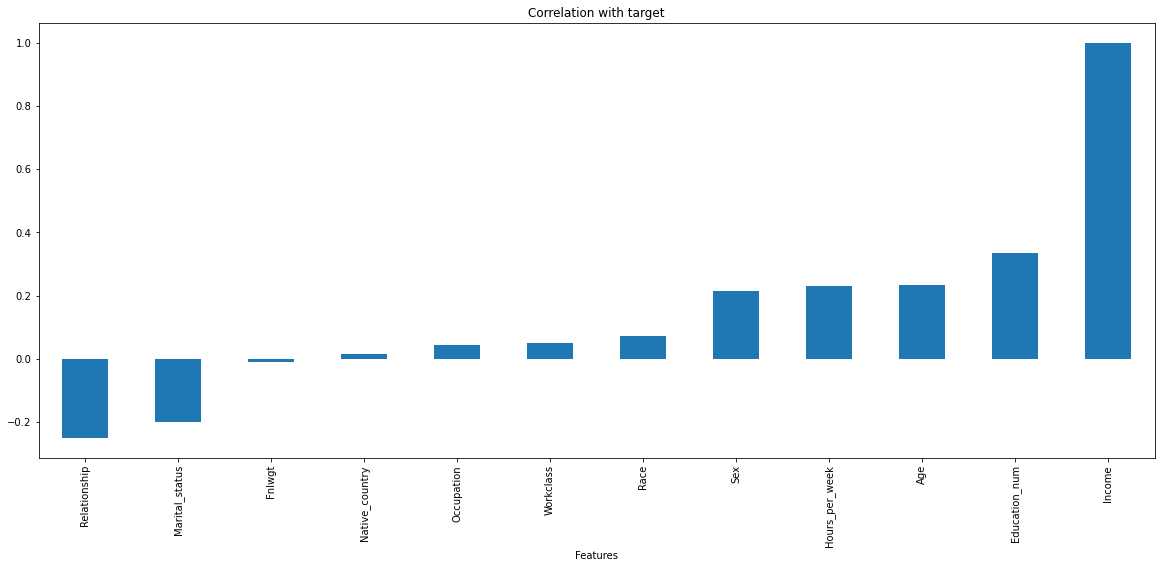

In [43]:
plt.figure(figsize=(20,8))
df.corr()['Income'].sort_values().plot(kind='bar')
plt.xlabel('Features')
plt.title('Correlation with target')
plt.show()

As per observation,
1. Fnlwgt, Native_contry, Occupation, Workclass, Race, features have very low corelation with target.
2. Education_num means Education corelate with traget. 

In [44]:
x=df.drop(columns='Income')
y=df.Income
x.skew().sort_values()

Native_country   -3.661060
Race             -2.435283
Workclass        -0.751854
Sex              -0.719400
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.065753
Hours_per_week    0.228752
Age               0.557657
Relationship      0.786514
Fnlwgt            1.447695
dtype: float64

Dataset is very skewed, let's try to handle it or save the most of data.

# Now use PowerTransformation method to save our skewed data.

In [45]:
from sklearn.preprocessing import PowerTransformer

df_pt = PowerTransformer()
df_pw = pd.DataFrame(df_pt.fit_transform(x),columns=x.columns)
df_pw.skew().sort_values()

Native_country   -2.728041
Race             -2.010646
Sex              -0.719400
Occupation       -0.213620
Marital_status   -0.114050
Age              -0.013967
Fnlwgt            0.016961
Education_num     0.023862
Workclass         0.061229
Relationship      0.123000
Hours_per_week    0.229590
dtype: float64

Using power transformation, most of skewness has removed

In [46]:
x1=df_pw.copy
x1=df_pw.drop(columns=['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
                        'Native_country', 'Education_num'])
x1.columns

Index(['Age', 'Fnlwgt', 'Hours_per_week'], dtype='object')

# Now remove remaining outliers using z-score technique.

In [47]:
from scipy.stats import zscore
z=np.abs(zscore(df_pw[['Age', 'Fnlwgt', 'Hours_per_week']]))
threshold=3
outliers_df=np.where(z>3)


In [48]:
df_new = df.drop(df.index[outliers_df[0]])

print('percentage of loss of data by zscore is :',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

percentage of loss of data by zscore is : 1.675067617408409


Very less data, we have loss using z-score method, let's proceed further.

# Now Separting columns into features and target

In [49]:
x_new=df_new.drop(columns='Income')
y_new=df_new.Income

In [50]:
df.Income.value_counts()

0.0    24697
1.0     7839
Name: Income, dtype: int64

It has been observed that our target class has an imbalance. So, we’ll try to resample the data

# SMOTE smapling

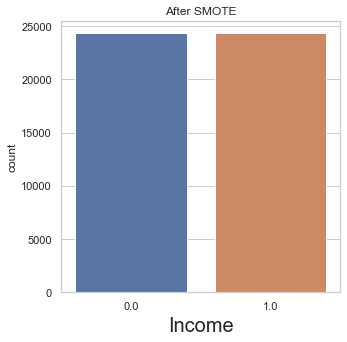

In [51]:
#Synthetic Minority Oversampling Technique (SMOTE)
#It is a statistical technique for increasing the number of cases in your dataset in a balanced way. 

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'not majority', random_state = 29)
x_res, y_res = sm.fit_resample(x_new, y_new)
y_res_df = pd.DataFrame(y_res)

plt.figure(figsize=(5,5))

sns.set(style = 'whitegrid')
sns.countplot(y_res_df.Income).set_title('After SMOTE')
plt.xlabel('Income',fontsize=20)
plt.show()

In [52]:
y_res_df.value_counts()

Income
0.0       24305
1.0       24305
dtype: int64

In [53]:
x_res.shape

(48610, 11)

# Data Scaling using Standard Scaler

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x_res),columns=x_res.columns)
x_scaled

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.782354,1.537420,-1.056709,1.045907,-0.326262,-0.837076,-0.776149,0.379231,0.628371,-2.749974,0.295387
1,-0.186828,0.060914,0.285360,-0.602077,-1.848645,-0.297158,-0.130172,0.379231,0.628371,-0.150277,0.295387
2,1.024649,0.060914,0.478808,-1.426069,-0.326262,-0.297158,-0.776149,-2.210670,0.628371,-0.150277,0.295387
3,-0.994480,0.060914,1.530355,1.045907,-0.326262,0.782677,2.453737,-2.210670,-1.706951,-0.150277,-4.374463
4,-0.267593,0.060914,0.984471,1.457903,-0.326262,-0.837076,2.453737,0.379231,-1.706951,-0.150277,0.295387
...,...,...,...,...,...,...,...,...,...,...,...
48605,-0.832950,0.539088,-0.746918,0.221915,-0.326262,-0.076246,-0.776149,0.379231,0.628371,1.197714,0.295387
48606,1.509240,0.959478,-0.081598,0.633911,-0.326262,-0.837076,-0.776149,0.379231,0.628371,1.005144,0.295387
48607,1.428475,-1.081160,-1.042541,-0.602077,-0.326262,-0.001826,-0.776149,-2.625692,0.628371,-0.150277,0.295387
48608,-0.186828,0.060914,-0.813405,-0.190081,-0.326262,1.120045,-0.776149,0.379231,0.628371,1.582854,0.295387


# PCA : Principal Component Analysis

                     PC1   PC2  PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  \
Explained_Variance  2.16  1.18  1.1  1.08  1.04  0.96  0.89  0.82  0.78  0.67   

                    PC11  
Explained_Variance  0.33  


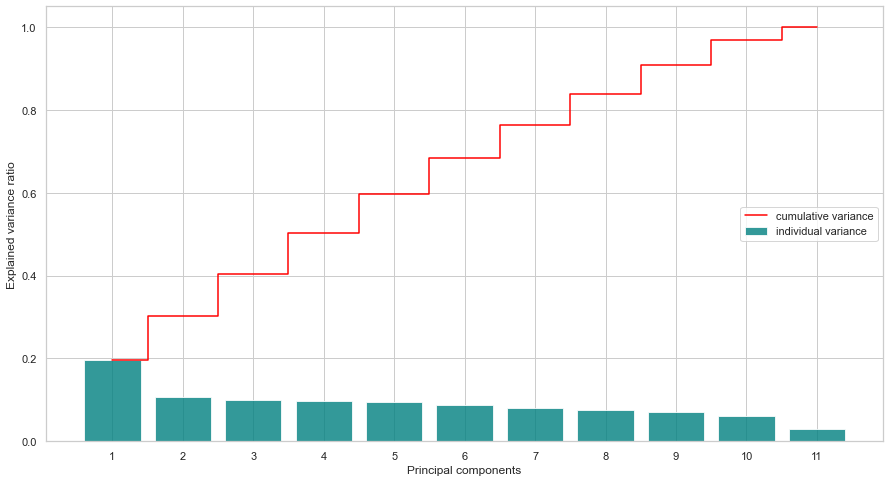

In [55]:
# Performing PCA
from sklearn.decomposition import PCA

pca = PCA(random_state = 1)
pca.fit(x_scaled)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["PC" + str(i) for i in range(1,12)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(15,8))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

As per PCA observation the first 10 components account for above 99% of the total explained variance. The dataset can reduced with 10 components and proceed further.

But let's take all components.

In [56]:
XC=x_scaled
yc=y_res_df

# Classification Model Development

In [63]:
#import the necessary model algos.

#classifiaction
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [58]:
LC = LogisticRegression()
DTC = DecisionTreeClassifier()
KNNC= KNeighborsClassifier()
RFC = RandomForestClassifier()
SVc = SVC()
GRAC= GradientBoostingClassifier()
ADAC= AdaBoostClassifier()
GNBC= GaussianNB()
SGDC= SGDClassifier()
XGBC= XGBClassifier()

In [59]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(), SVC(),
       GradientBoostingClassifier(),AdaBoostClassifier(),GaussianNB(),SGDClassifier(),XGBClassifier()]

models=['LC=LogisticRegression','DTC=DecisionTreeClassifier','KNNC=KNeighborsClassifier','RFC=RandomForestClassifier',
        'SVc=SVC()','GRAC=GradientBoostingClassifier','ADAC=AdaBoostClassifier','GNBC=GaussianNB', 'SGDC=SGDClassifier()',
        'XGBC=XGBClassifier()']

acc_result=[]
train_result=[]

x_train,x_test,y_train,y_test=train_test_split(XC,yc,test_size=0.20,random_state=29)

for i in range(len(model)):
    clf=model[i]
    clf.fit(x_train,y_train)
    x_pred=clf.predict(x_train)
    y_pred=clf.predict(x_test)
    train_result.append(round (accuracy_score(y_train,x_pred)*100,2))
    acc_result.append(round (accuracy_score(y_pred,y_test)*100,2))

Result_df=pd.DataFrame({'Model Name':models, 'Training Score:':train_result ,'Accuracy Score (without tuning)':acc_result})
Result_df

,Model Name,Training Score:,Accuracy Score (without tuning)
0,LC=LogisticRegression,74.90,74.88
1,DTC=DecisionTreeClassifier,100.00,83.88
2,KNNC=KNeighborsClassifier,88.70,82.87
3,RFC=RandomForestClassifier,100.00,88.26
4,SVc=SVC(),84.92,84.08
5,GRAC=GradientBoostingClassifier,88.32,87.69
6,ADAC=AdaBoostClassifier,86.64,86.31
7,GNBC=GaussianNB,76.88,77.10
8,SGDC=SGDClassifier(),74.96,74.68
9,XGBC=XGBClassifier(),92.30,88.81


# 1. Logistic Regression:

In [60]:
acc_train=[]
acc_test=[]

for i in range (0,1000):
    x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.20, random_state=i)
    
    lc = LogisticRegression()
    lc.fit(x_train,y_train)
    
    x_lc_predict=lc.predict(x_train)
    y_lc_predict=lc.predict(x_test)
    
    acc_train.append(accuracy_score(y_train,x_lc_predict))
    acc_test.append(accuracy_score(y_test,y_lc_predict))
    

acc_train_index= acc_train.index(max(acc_train))    
print("Index of max vaule of train's accuracy_score at random_state:",acc_train_index)

acc_test_index= acc_test.index(max(acc_test))
print("Index of max vaule of test's accuracy_score at random_state:",acc_test_index)

Index of max vaule of train's accuracy_score at random_state: 362
Index of max vaule of test's accuracy_score at random_state: 602


Always choose best training score for random_state, because

1. if training score >= testing score ==> chance of best fit or undetfit
2. if training score << testing score ==> overfit
3. if training score >> testing score ==> undetfit


In [64]:
kford_cv=KFold(n_splits=10,shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.20, random_state=362)
    
lc.fit(x_train,y_train)
x_lc_predict=lc.predict(x_train)
y_lc_predict=lc.predict(x_test)
lc_cv = cross_val_score(lc,XC,yc,cv=kford_cv, scoring='accuracy')
    
print ("The training accurancy @ 362 random_state is:",accuracy_score(y_train,x_lc_predict))
print ("The testing accurancy @ 362 ranom_state is:",accuracy_score(y_test,y_lc_predict))
print ("Cross Validation: ", lc_cv.mean())
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_lc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_lc_predict))

The training accurancy @ 362 random_state is: 0.752468627854351
The testing accurancy @ 362 ranom_state is: 0.7376054309812796
Cross Validation:  0.7168072413083728

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.76      0.71      0.73      4914
         1.0       0.72      0.77      0.74      4808

    accuracy                           0.74      9722
   macro avg       0.74      0.74      0.74      9722
weighted avg       0.74      0.74      0.74      9722


 Conconfusion_matrix:
 [[3478 1436]
 [1115 3693]]


# 2. Decision Tree:

In [65]:
kfld=KFold(n_splits=10)


grid_param = {
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_features':['auto','sqrt','log2'],
            'max_depth': range(10,15), # the max depth of the tree.
            'min_samples_leaf': range (2,6), # the max no of samples required to be at a leaf node.
            'min_samples_split': range (3,8), # the max no of samples required to split on interval node.
            'max_leaf_nodes': range (5,10) # Best nodes are defined as a realtive in impurity. If none then nunlimited no of leaf nodes.
}
grid_search = GridSearchCV (DTC, param_grid = grid_param, cv=kfld, n_jobs = -1)
# n_jobs : Use all the cores in your system. For performance improvement.
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8),
                         'splitter': ['best', 'random']})

In [66]:
#Initiate DecisitionTreeClassifier with new parametes and train
dtc=grid_search.best_estimator_

# Train the model
dtc.fit(x_train,y_train)

x_dtc_predict=dtc.predict(x_train)
y_dtc_predict=dtc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_dtc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_dtc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_dtc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_dtc_predict))

The training accurancy is: 0.7956696153054927
The testing accurancy is: 0.7946924501131455

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.83      0.75      0.79      4914
         1.0       0.77      0.84      0.80      4808

    accuracy                           0.79      9722
   macro avg       0.80      0.80      0.79      9722
weighted avg       0.80      0.79      0.79      9722


 Conconfusion_matrix:
 [[3683 1231]
 [ 765 4043]]


# 3. K-Nearest Neighbour:

In [68]:
neighbors = [i for i in range(1,10)]
parameter_grid = { 'algorithm' : ['kd_tree', 'brute'],
                   'weights':['uniform', 'distance'],
                   'leaf_size' : [3,5,6,7,8,10],
                   'n_neighbors': neighbors}
gridsearch = GridSearchCV(KNNC, param_grid=parameter_grid)
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8, 10],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [69]:
#Initiate KNN with new parametes and train
knnc=gridsearch.best_estimator_

# Train the model
knnc.fit(x_train,y_train)

x_knnc_predict=knnc.predict(x_train)
y_knnc_predict=knnc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_knnc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_knnc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_knnc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_knnc_predict))

The training accurancy is: 0.9999742851265172
The testing accurancy is: 0.8486936844270726

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.81      0.84      4914
         1.0       0.82      0.89      0.85      4808

    accuracy                           0.85      9722
   macro avg       0.85      0.85      0.85      9722
weighted avg       0.85      0.85      0.85      9722


 Conconfusion_matrix:
 [[3979  935]
 [ 536 4272]]


# 4. Random forest:

In [70]:
params = {  'n_estimators' : [10,15,30,40,50],
            'criterion':['gini','entropy'],
            'max_depth': [10,15,40], # the max depth of the tree.
            'min_samples_leaf': [5,6], # the max no of samples required to be at a leaf node.
            'min_samples_split': [10,11] # the max no of samples required to split on interval node.
            #'max_leaf_nodes': range (5,10) # Best nodes are defined as a realtive in impurity. If none then nunlimited no of leaf nodes.
}

gridsearch_rf = GridSearchCV(RFC, param_grid=params,cv=10, n_jobs = -1)
gridsearch_rf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 40], 'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [10, 15, 30, 40, 50]})

In [71]:
#Initiate RandomForestClassifier with new parametes and train
rfc=gridsearch_rf.best_estimator_

# Train the model
rfc.fit(x_train,y_train)

x_rfc_predict=rfc.predict(x_train)
y_rfc_predict=rfc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_rfc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_rfc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_rfc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_rfc_predict))

The training accurancy is: 0.9171209627648632
The testing accurancy is: 0.8778029212096277

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      4914
         1.0       0.88      0.87      0.88      4808

    accuracy                           0.88      9722
   macro avg       0.88      0.88      0.88      9722
weighted avg       0.88      0.88      0.88      9722


 Conconfusion_matrix:
 [[4337  577]
 [ 611 4197]]


# 5. SVC:

In [72]:
#Initiate RandomForestClassifier with new parametes and train
svc=SVC(gamma='auto')

# Train the model
svc.fit(x_train,y_train)

x_svc_predict=svc.predict(x_train)
y_svc_predict=svc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_svc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_svc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_svc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_svc_predict))

The training accurancy is: 0.8507251594322156
The testing accurancy is: 0.8368648426249743

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      4914
         1.0       0.80      0.89      0.84      4808

    accuracy                           0.84      9722
   macro avg       0.84      0.84      0.84      9722
weighted avg       0.84      0.84      0.84      9722


 Conconfusion_matrix:
 [[3872 1042]
 [ 544 4264]]


# 6. Gradient Boosting Classifier:

In [73]:
#Initiate RandomForestClassifier with new parametes and train
grac=GradientBoostingClassifier(learning_rate= 0.1)

# Train the model
grac.fit(x_train,y_train)

x_grac_predict=grac.predict(x_train)
y_grac_predict=grac.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_grac_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_grac_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_grac_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_grac_predict))

The training accurancy is: 0.8813001440032915
The testing accurancy is: 0.879345813618597

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      4914
         1.0       0.87      0.88      0.88      4808

    accuracy                           0.88      9722
   macro avg       0.88      0.88      0.88      9722
weighted avg       0.88      0.88      0.88      9722


 Conconfusion_matrix:
 [[4308  606]
 [ 567 4241]]


# 7. AdaBoost Classifier:

In [74]:
#Initiate RandomForestClassifier with new parametes and train
adac=AdaBoostClassifier(learning_rate= 0.01, base_estimator=RandomForestClassifier())

# Train the model
adac.fit(x_train,y_train)

x_adac_predict=adac.predict(x_train)
y_adac_predict=adac.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_adac_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_adac_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_adac_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_adac_predict))

The training accurancy is: 0.9999742851265172
The testing accurancy is: 0.8804772680518412

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.88      0.88      4914
         1.0       0.88      0.88      0.88      4808

    accuracy                           0.88      9722
   macro avg       0.88      0.88      0.88      9722
weighted avg       0.88      0.88      0.88      9722


 Conconfusion_matrix:
 [[4317  597]
 [ 565 4243]]


# 8. GaussianNB:

In [75]:
#Initiate RandomForestClassifier with new parametes and train
gnbc=GaussianNB()

# Train the model
gnbc.fit(x_train,y_train)

x_gnbc_predict=gnbc.predict(x_train)
y_gnbc_predict=gnbc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_gnbc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_gnbc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_gnbc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_gnbc_predict))

The training accurancy is: 0.7701090310635672
The testing accurancy is: 0.7613659740794075

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.78      0.73      0.76      4914
         1.0       0.74      0.79      0.77      4808

    accuracy                           0.76      9722
   macro avg       0.76      0.76      0.76      9722
weighted avg       0.76      0.76      0.76      9722


 Conconfusion_matrix:
 [[3591 1323]
 [ 997 3811]]


# 9. SGDClassifier:

In [76]:
#Initiate RandomForestClassifier with new parametes and train
sgdc=SGDClassifier(alpha=0.001)

# Train the model
sgdc.fit(x_train,y_train)

x_sgdc_predict=sgdc.predict(x_train)
y_sgdc_predict=sgdc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_sgdc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_sgdc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_sgdc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_sgdc_predict))

The training accurancy is: 0.7533686484262497
The testing accurancy is: 0.7406912157992183

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.78      0.68      0.72      4914
         1.0       0.71      0.81      0.75      4808

    accuracy                           0.74      9722
   macro avg       0.75      0.74      0.74      9722
weighted avg       0.75      0.74      0.74      9722


 Conconfusion_matrix:
 [[3323 1591]
 [ 930 3878]]


# 10. XGBClassifier:

In [77]:
#Initiate RandomForestClassifier with new parametes and train
xgbc=XGBClassifier(n_estimators = 10, learning_rate = 1.5)

# Train the model
xgbc.fit(x_train,y_train)

x_xgbc_predict=xgbc.predict(x_train)
y_xgbc_predict=xgbc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_xgbc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_xgbc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_xgbc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_xgbc_predict))

The training accurancy is: 0.8910203661797984
The testing accurancy is: 0.87399711993417

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      4914
         1.0       0.87      0.88      0.87      4808

    accuracy                           0.87      9722
   macro avg       0.87      0.87      0.87      9722
weighted avg       0.87      0.87      0.87      9722


 Conconfusion_matrix:
 [[4289  625]
 [ 600 4208]]


In [78]:
Acc_Score_tun =[round (accuracy_score(y_test,y_lc_predict)*100,2),
                round (accuracy_score(y_test,y_dtc_predict)*100,2),
                round (accuracy_score(y_test,y_knnc_predict)*100,2),
                round (accuracy_score(y_test,y_rfc_predict)*100,2),
                round (accuracy_score(y_test,y_svc_predict)*100,2),
                round (accuracy_score(y_test,y_grac_predict)*100,2),
                round (accuracy_score(y_test,y_adac_predict)*100,2),
                round (accuracy_score(y_test,y_gnbc_predict)*100,2),
                round (accuracy_score(y_test,y_sgdc_predict)*100,2),
                round (accuracy_score(y_test,y_xgbc_predict)*100,2)]
Census_Income = pd.DataFrame({'Classifier':['lc= LogisticRegression()', 'dtc = DecisionTreeClassifier()',
                                 'knnc = KNeighborsClassifier()','rfc = RandomForestClassifier()','svc=SVC()',
                                 'grac = GradientBoostingClassifier()', 'adac=AdaBoostClassifier','gnbc=GaussianNB', 
                                  'sgdc=SGDClassifier()', 'xgbc=XGBClassifier()'], 
                                 
                                'Accuracy Score (with tuning)':Acc_Score_tun})
Census_Income

,Classifier,Accuracy Score (with tuning)
0,lc= LogisticRegression(),73.76
1,dtc = DecisionTreeClassifier(),79.47
2,knnc = KNeighborsClassifier(),84.87
3,rfc = RandomForestClassifier(),87.78
4,svc=SVC(),83.69
5,grac = GradientBoostingClassifier(),87.93
6,adac=AdaBoostClassifier,88.05
7,gnbc=GaussianNB,76.14
8,sgdc=SGDClassifier(),74.07
9,xgbc=XGBClassifier(),87.40


In [79]:
CENSUS_INCOME= pd.concat([Result_df,Census_Income],axis=1)
CENSUS_INCOME

,Model Name,Training Score:,Accuracy Score (without tuning),Classifier,Accuracy Score (with tuning)
0,LC=LogisticRegression,74.90,74.88,lc= LogisticRegression(),73.76
1,DTC=DecisionTreeClassifier,100.00,83.88,dtc = DecisionTreeClassifier(),79.47
2,KNNC=KNeighborsClassifier,88.70,82.87,knnc = KNeighborsClassifier(),84.87
3,RFC=RandomForestClassifier,100.00,88.26,rfc = RandomForestClassifier(),87.78
4,SVc=SVC(),84.92,84.08,svc=SVC(),83.69
5,GRAC=GradientBoostingClassifier,88.32,87.69,grac = GradientBoostingClassifier(),87.93
6,ADAC=AdaBoostClassifier,86.64,86.31,adac=AdaBoostClassifier,88.05
7,GNBC=GaussianNB,76.88,77.10,gnbc=GaussianNB,76.14
8,SGDC=SGDClassifier(),74.96,74.68,sgdc=SGDClassifier(),74.07
9,XGBC=XGBClassifier(),92.30,88.81,xgbc=XGBClassifier(),87.40


# We are gettig high model accuracy: 88.81% with XGBClassifier model without tuning, which shows model is performing exremely well, so we can save this model.

# Save the model using pickle

In [80]:
import pickle
pickle.dump(XGBC,open('Global_Power_Plant-ClassificationModel_Fuel_Type','wb'))